#📌 Extracão

In [110]:
import pandas as pd
import numpy as np
import requests
import json
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/sthemonica/alura-voz/refs/heads/main/Dados/Telco-Customer-Churn.json"

df = pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformação

In [81]:
# Normalizando os dados
df = requests.get(url)
resultado = json.loads(df.text)

df_normalizado = pd.json_normalize(resultado, sep='_')
df_normalizado.head(7)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.4,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.7,7904.25


In [82]:
# Renomeando as colunas
df_normalizado.rename(columns={
    'customerID': 'Cliente_ID',
    'Churn': 'Cancelamento',
    'customer_gender': 'Gênero',
    'customer_SeniorCitizen': 'Idoso',
    'customer_Partner': 'Tem_Companheiro',
    'customer_Dependents': 'Tem_Dependentes',
    'customer_tenure': 'Meses_de_Contrato',
    'phone_PhoneService': 'Telefone_Ativo',
    'phone_MultipleLines': 'Multiplas_Linhas',
    'internet_InternetService': 'Tipo_Internet',
    'internet_OnlineSecurity': 'Seguranca_Online',
    'internet_OnlineBackup': 'Backup_Online',
    'internet_DeviceProtection': 'Protecao_Dispositivo',
    'internet_TechSupport': 'Suporte_Tecnico',
    'internet_StreamingTV': 'Streaming_TV',
    'internet_StreamingMovies': 'Streaming_Filmes',
    'account_Contract': 'Tipo_Contrato',
    'account_PaperlessBilling': 'Fatura_Digital',
    'account_PaymentMethod': 'Forma_Pagamento',
    'account_Charges_Monthly': 'Valor_Mensal',
    'account_Charges_Total': 'Valor_Total',
    'account_Charges_Monthly': 'Meses_Estimados',
    'Conta_Diarias': 'Conta_Diaria'
}, inplace=True)

df_normalizado.head()

,Cliente_ID,Cancelamento,Gênero,Idoso,Tem_Companheiro,Tem_Dependentes,Meses_de_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Forma_Pagamento,Meses_Estimados,Valor_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [83]:
# Identificando identificando valores vazios no Cancelamento
df_normalizado['Cancelamento'] = df_normalizado['Cancelamento'].replace(r'^\s*$', np.nan, regex=True)

In [84]:
# Identificando os valores NAN no Cancelamento e sobstituindo por NO
df_normalizado['Cancelamento'] = df_normalizado['Cancelamento'].fillna('No')

In [85]:
# Verificar os valores únicos em cada coluna
for coluna in df_normalizado.columns:
    valores_unicos = df_normalizado[coluna].unique()
    print(f'Valores únicos na coluna {coluna}:')
    print(valores_unicos)
    print('\n')

Valores únicos na coluna Cliente_ID:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']


Valores únicos na coluna Cancelamento:
['No' 'Yes']


Valores únicos na coluna Gênero:
['Female' 'Male']


Valores únicos na coluna Idoso:
[0 1]


Valores únicos na coluna Tem_Companheiro:
['Yes' 'No']


Valores únicos na coluna Tem_Dependentes:
['Yes' 'No']


Valores únicos na coluna Meses_de_Contrato:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]


Valores únicos na coluna Telefone_Ativo:
['Yes' 'No']


Valores únicos na coluna Multiplas_Linhas:
['No' 'Yes' 'No phone service']


Valores únicos na coluna Tipo_Internet:
['DSL' 'Fiber optic' 'No']


Valores únicos na coluna Seguranca_Online:
['No' 'Yes' 'No internet service']


Valores únicos na coluna Backup_Online:
['Yes' 'No' 'No interne

In [87]:
for col in df_normalizado.columns:
    if (df_normalizado[col].astype(str).str.strip() == '').any():
        print(f"Column '{col}' contains empty strings.")

df_normalizado['Valor_Total'] = pd.to_numeric(df_normalizado['Valor_Total'], errors='coerce')

colunas_binarias = [
    'Cancelamento',
    'Tem_Companheiro',
    'Tem_Dependentes',
    'Telefone_Ativo',
    'Multiplas_Linhas',
    'Backup_Online',
    'Protecao_Dispositivo',
    'Suporte_Tecnico',
    'Streaming_TV',
    'Streaming_Filmes',
    'Fatura_Digital'
]

for col in colunas_binarias:
    df_normalizado[col] = (
        df_normalizado[col]
        .replace({
            'Yes': 1,
            'No': 0,
            'No phone service': 0,
            'No internet service': 0
        })
        .astype(int)
        .infer_objects(copy=False)
    )

print(df_normalizado[colunas_binarias].dtypes)

Cancelamento            int64
Tem_Companheiro         int64
Tem_Dependentes         int64
Telefone_Ativo          int64
Multiplas_Linhas        int64
Backup_Online           int64
Protecao_Dispositivo    int64
Suporte_Tecnico         int64
Streaming_TV            int64
Streaming_Filmes        int64
Fatura_Digital          int64
dtype: object


In [88]:
# Verificar tipos das colunas
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cliente_ID            7267 non-null   object 
 1   Cancelamento          7267 non-null   int64  
 2   Gênero                7267 non-null   object 
 3   Idoso                 7267 non-null   int64  
 4   Tem_Companheiro       7267 non-null   int64  
 5   Tem_Dependentes       7267 non-null   int64  
 6   Meses_de_Contrato     7267 non-null   int64  
 7   Telefone_Ativo        7267 non-null   int64  
 8   Multiplas_Linhas      7267 non-null   int64  
 9   Tipo_Internet         7267 non-null   object 
 10  Seguranca_Online      7267 non-null   object 
 11  Backup_Online         7267 non-null   int64  
 12  Protecao_Dispositivo  7267 non-null   int64  
 13  Suporte_Tecnico       7267 non-null   int64  
 14  Streaming_TV          7267 non-null   int64  
 15  Streaming_Filmes     

In [89]:
# Verificando valores ausentes
df_normalizado.isnull().sum()

,0
Cliente_ID,0
Cancelamento,0
Gênero,0
Idoso,0
Tem_Companheiro,0
Tem_Dependentes,0
Meses_de_Contrato,0
Telefone_Ativo,0
Multiplas_Linhas,0
Tipo_Internet,0


In [90]:
# Vazios ou em branco
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
Cliente_ID,0
Cancelamento,0
Gênero,0
Idoso,0
Tem_Companheiro,0
Tem_Dependentes,0
Meses_de_Contrato,0
Telefone_Ativo,0
Multiplas_Linhas,0
Tipo_Internet,0


In [91]:
# Duplicados
print("Numero de duplicados:", df_normalizado.duplicated().sum())

Numero de duplicados: 0


In [92]:
# Clientes duplicados
df_sem_duplicatas = df_normalizado.drop_duplicates(subset=['Cliente_ID'], keep='first')
df_sem_duplicatas

,Cliente_ID,Cancelamento,Gênero,Idoso,Tem_Companheiro,Tem_Dependentes,Meses_de_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Dispositivo,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Digital,Forma_Pagamento,Meses_Estimados,Valor_Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.90
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


#📊 Carga e análise

In [93]:
# Análise para colunas numéricas
numerica = df_normalizado.describe().T

In [94]:
# Mediana
numerica['mediana'] = df_normalizado.median(numeric_only=True)

In [95]:
numerica

,count,mean,std,min,25%,50%,75%,max,mediana
Cancelamento,7267.0,0.257190,0.437115,0.00,0.000,0.0,1.000,1.00,0.0
Idoso,7267.0,0.162653,0.369074,0.00,0.000,0.0,0.000,1.00,0.0
Tem_Companheiro,7267.0,0.484106,0.499782,0.00,0.000,0.0,1.000,1.00,0.0
Tem_Dependentes,7267.0,0.300124,0.458343,0.00,0.000,0.0,1.000,1.00,0.0
Meses_de_Contrato,7267.0,32.346498,24.571773,0.00,9.000,29.0,55.000,72.00,29.0
Telefone_Ativo,7267.0,0.902711,0.296371,0.00,1.000,1.0,1.000,1.00,1.0
Multiplas_Linhas,7267.0,0.421770,0.493876,0.00,0.000,0.0,1.000,1.00,0.0
Backup_Online,7267.0,0.344571,0.475261,0.00,0.000,0.0,1.000,1.00,0.0
Protecao_Dispositivo,7267.0,0.342782,0.474672,0.00,0.000,0.0,1.000,1.00,0.0
Suporte_Tecnico,7267.0,0.289528,0.453575,0.00,0.000,0.0,1.000,1.00,0.0


In [96]:
# Análise de colunas não numéricas
nao_numerica = df_normalizado.describe(include='object').T

In [97]:
nao_numerica

,count,unique,top,freq
Cliente_ID,7267,7267,9995-HOTOH,1
Gênero,7267,2,Male,3675
Tipo_Internet,7267,3,Fiber optic,3198
Seguranca_Online,7267,3,No,3608
Tipo_Contrato,7267,3,Month-to-month,4005
Forma_Pagamento,7267,4,Electronic check,2445


In [123]:
# Quantos clientes cancelaram
contagem_cancelamento = df_normalizado['Cancelamento'].value_counts().reset_index()
contagem_cancelamento.columns = ['Cancelamento', 'Quantidade']
contagem_cancelamento

,Cancelamento,Quantidade
0,0,5398
1,1,1869


In [125]:
# Contagem de cancelamento por gênero
contagem_genero = df_normalizado['Gênero'].value_counts().reset_index()
contagem_genero.columns = ['Gênero', 'Quantidade']
contagem_genero

,Gênero,Quantidade
0,Male,3675
1,Female,3592


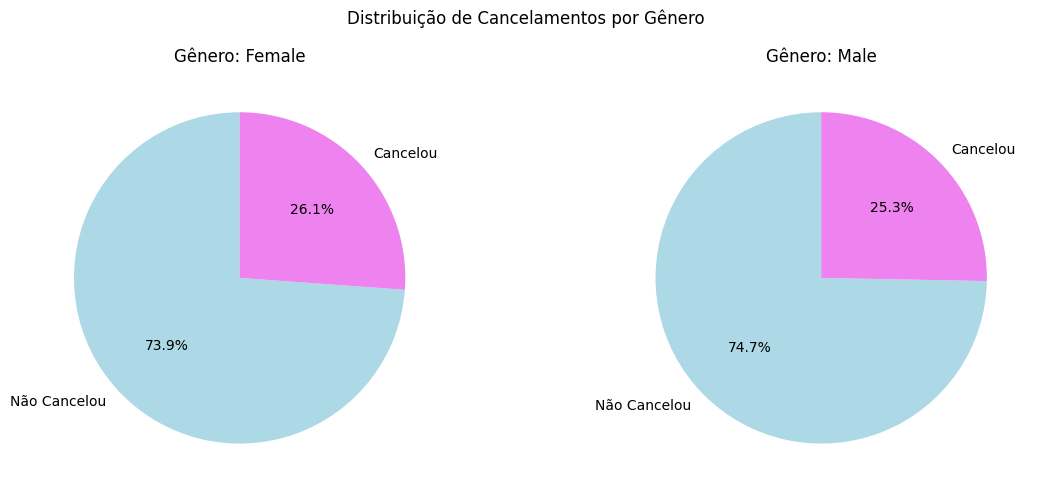

In [145]:
# Gráfico de pizza
genders = df_normalizado['Gênero'].unique()

fig, axes = plt.subplots(1, len(genders), figsize=(12, 5))

for i, gender in enumerate(genders):
    data = df_normalizado[df_normalizado['Gênero'] == gender]['Cancelamento'].value_counts()
    axes[i].pie(data, labels=['Não Cancelou', 'Cancelou'], autopct='%1.1f%%',
                colors=['lightblue', 'violet'], startangle=90)
    axes[i].set_title(f'Gênero: {gender}')

plt.suptitle('Distribuição de Cancelamentos por Gênero')
plt.tight_layout()
plt.show()

In [139]:
# Contagem de cancelamento por idade
contagem_idoso = df_normalizado['Idoso'].value_counts().reset_index()
contagem_idoso.columns = ['Idoso', 'Quantidade']


,Idoso,Quantidade
0,0,6085
1,1,1182


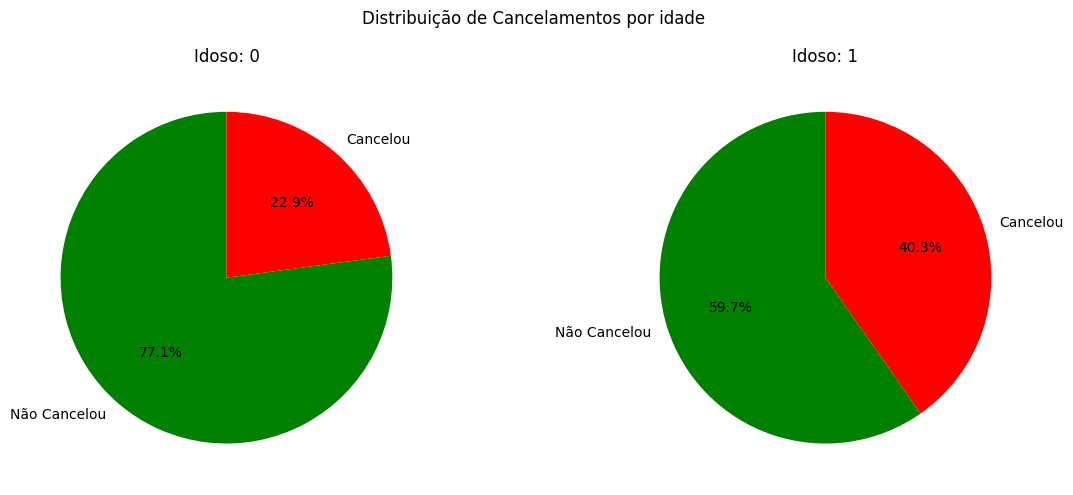

In [147]:
# Gráfico de pizza
idoso_values = df_normalizado['Idoso'].unique()

fig, axes = plt.subplots(1, len(idoso_values), figsize=(12, 5))

for i, idoso in enumerate(idoso_values):
    data = df_normalizado[df_normalizado['Idoso'] == idoso]['Cancelamento'].value_counts()
    axes[i].pie(data, labels=['Não Cancelou', 'Cancelou'], autopct='%1.1f%%',
                colors=['green', 'red'], startangle=90)
    axes[i].set_title(f'Idoso: {idoso}')

plt.suptitle('Distribuição de Cancelamentos por idade')
plt.tight_layout()
plt.show()

In [155]:
#agrupar por meses de contrato e cancelamento
df_agrupado = df_normalizado.groupby(['Meses_de_Contrato', 'Cancelamento']).size().unstack(fill_value=0)
#calcular a taxa de cancelamento por tempo de contrato
df_agrupado['taxa_de_cancelamento'] = (df_agrupado.get('Yes', 0) / df_agrupado.sum(axis=1)) * 100
df_agrupado

Cancelamento,0,1,taxa_de_cancelamento
Meses_de_Contrato,,,
0,11,0,0.0
1,254,380,0.0
2,123,123,0.0
3,113,94,0.0
4,102,83,0.0
...,...,...,...
68,95,9,0.0
69,92,8,0.0
70,111,11,0.0


In [164]:
import plotly.express as px

fig = px.histogram(df_normalizado, x='Meses_de_Contrato', text_auto= True, color='Cancelamento', barmode = 'group', title='Relação entre Meses de Contrato e Cancelamento',
    color_discrete_map={
        0: 'red', # Não
        1: 'blue' # Sim
    }
)
fig.show()

#📄Relatorio Final

## ❗ Grupos com maior risco de evasão

### 1. Mulheres
### 1. Idosos
### 1. Contratos de pouca duração (baixa tenure)